In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

data = pd.read_csv("googleplaystore.csv")
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
# Gathering the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Obsevation - we know the information of rows and columns is 10840,13 respectively.

In [5]:
# Data Cleaning

data['Reviews'] = pd.to_numeric(data['Reviews'], errors = 'coerce')
data['Reviews']

,Reviews
0,159.0
1,967.0
2,87510.0
3,215644.0
4,967.0
...,...
10836,38.0
10837,4.0
10838,3.0
10839,114.0


In [6]:
#Size changing

def fix_size(s):
  try:
    if s.endswith('M'):
      return float(s[:-1])
    elif s.endswith('k'):
      return (float(s[:-1]) / 1024)
    elif s == '1,000+':
      return 1.0
    else:
      return np.nan
  except:
      return np.nan

In [7]:
data['Size']= data['Size'].apply(fix_size)
data['Size']

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
10836,53.0
10837,3.6
10838,9.5
10839,NaN


In [8]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [9]:
def clean_price(value):
  try:
    return float(value.replace('$',''))
  except:
    return np.nan

data['Price'] = data['Price'].apply(clean_price)
data['Price']

,Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10836,0.0
10837,0.0
10838,0.0
10839,0.0


In [10]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
def lower_category(B):
  return B.title()

data['Category'] =data['Category'].apply(lower_category)

In [12]:
data['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation',
       '1.9'], dtype=object)

In [13]:
data.sample(9)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10652,FutureNet your social app,Social,4.2,2093.0,7.0,"100,000+",Free,0.00,Teen,Social,"March 8, 2018",3.36,4.2 and up
3877,Akinator,Family,4.3,1805398.0,55.0,"50,000,000+",Free,0.00,Teen,Entertainment,"June 11, 2018",6.5.2,4.4 and up
2038,PJ Masks: Moonlight Heroes,Family,4.4,86961.0,99.0,"10,000,000+",Free,0.00,Everyone,Casual;Action & Adventure,"June 5, 2018",2.0.1,4.0.3 and up
9278,EF Parеnts,Family,4.1,435.0,17.0,"50,000+",Free,0.00,Everyone,Education,"June 21, 2018",3.1.0,4.1 and up
7633,Co Checker,Tools,1.9,12.0,2.0,"1,000+",Free,0.00,Everyone,Tools,"October 20, 2017",1.8.6,4.3 and up
4758,iSwipe Phone X,Tools,4.7,58366.0,6.3,"1,000,000+",Free,0.00,Everyone,Tools,"December 7, 2017",1.0,4.1 and up
8726,DRAGON QUEST VI,Family,4.4,3358.0,17.0,"100,000+",Paid,14.99,Everyone,Role Playing,"August 1, 2018",1.0.4,2.3 and up
4718,"Dating App, Flirt & Chat : W-Match",Social,4.3,175523.0,NaN,"10,000,000+",Free,0.00,Mature 17+,Social,"July 23, 2018",Varies with device,Varies with device
8326,Digital Falak,Tools,4.7,3408.0,15.0,"50,000+",Free,0.00,Everyone,Tools,"May 30, 2018",2.1.1,4.1 and up


In [14]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'],errors='coerce')
data['Last Updated']

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10836,2017-07-25
10837,2018-07-06
10838,2017-01-20
10839,2015-01-19


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [16]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [17]:
data['Installs'] = data.Installs.str.replace(",","")
data['Installs'] = data.Installs.str.replace("+","")
data['Installs'] = data['Installs'].str.replace("Free",'0')
data['Installs'] = pd.to_numeric(data['Installs'], errors = 'coerce')
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [18]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [19]:
def fix_version(y):
  try:
    if y == 'Varies with device':
      return np.nan
    elif y == '4.4W and up':
      return y.replace('W','')
    else:
      return y
  except:
      return y

data['Android Ver'] = data['Android Ver'].apply(fix_version)
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up', nan,
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '7.1 and up', '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0',
       '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', '5.0 - 6.0',
       '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [20]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5095,AG Subway Simulator Lite,Family,4.4,6738.0,56.000000,100000,Free,0.0,Everyone,Simulation,2018-06-08,1.2.6,4.1 and up
6380,Daily Murli Saar Widget,Social,4.6,308.0,0.443359,10000,Free,0.0,Everyone,Social,2015-06-10,1.0,3.0 and up
4582,S Pen Keeper,Tools,3.8,560.0,0.306641,50000,Free,0.0,Everyone,Tools,2018-06-08,2.1.0.032,4.0.3 and up
8951,DV KING 4K,Photography,2.3,3.0,8.500000,100,Free,0.0,Everyone,Photography,2018-07-17,1.0.10,4.0 and up
5502,Aqw&3d Design Notes Manager,Family,4.5,11.0,2.900000,500,Free,0.0,Everyone,Entertainment,2017-08-15,3.0,4.0.3 and up


In [21]:
# Null values

data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,1
Size,1695
Installs,0
Type,1
Price,1
Content Rating,1
Genres,0


In [22]:
# Duplicated Value

data.duplicated().sum()

483

In [23]:
# Memory usage

data.memory_usage()

,0
Index,128
App,86728
Category,86728
Rating,86728
Reviews,86728
Size,86728
Installs,86728
Type,86728
Price,86728
Content Rating,86728


In [24]:
# Removing Null Values

data.dropna(inplace=True)

In [25]:
data.isnull().sum().sum()

0

In [26]:
# Statistical Analysis

data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rating,7667.0,4.17304,1.0,4.0,4.3,4.5,5.0,0.545369
Reviews,7667.0,294488.088301,1.0,106.0,2250.0,38320.0,44893888.0,1869616.243865
Size,7667.0,22.983464,0.008301,5.3,14.0,33.0,100.0,23.476298
Installs,7667.0,8198582.642233,1.0,10000.0,100000.0,1000000.0,1000000000.0,49340484.910436
Price,7667.0,1.134586,0.0,0.0,0.0,0.0,400.0,17.47072
Last Updated,7667,2017-10-27 14:48:33.995043584,2010-05-21 00:00:00,2017-07-27 00:00:00,2018-05-15 00:00:00,2018-07-17 00:00:00,2018-08-08 00:00:00,NaN


In [27]:
# Numerical Features

numerical_features = [i for i in data.columns if data[i].dtype != 'O' and data[i].dtype != 'datetime64[ns]']
data[numerical_features]

,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19.000000,10000,0.0
1,3.9,967.0,14.000000,500000,0.0
2,4.7,87510.0,8.700000,5000000,0.0
3,4.5,215644.0,25.000000,50000000,0.0
4,4.3,967.0,2.800000,100000,0.0
...,...,...,...,...,...
10832,3.8,1195.0,0.568359,100000,0.0
10833,4.8,44.0,0.604492,1000,0.0
10834,4.0,7.0,2.600000,500,0.0
10836,4.5,38.0,53.000000,5000,0.0


In [28]:
# Categorical_Columns

categorical_columns = [i for i in data.columns if data[i].dtype == 'O']
data[categorical_columns]

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,Art_And_Design,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up
...,...,...,...,...,...,...,...
10832,FR Tides,Weather,Free,Everyone,Weather,6.0,2.1 and up
10833,Chemin (fr),Books_And_Reference,Free,Everyone,Books & Reference,0.8,2.2 and up
10834,FR Calculator,Family,Free,Everyone,Education,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,Family,Free,Everyone,Education,1.48,4.1 and up


In [29]:
fixed_features = [i for i in data.columns if data[i].dtype == 'datetime64[ns]']
data_fixed_features = data[fixed_features]

print("\nData with only datetime columns:")
print(data_fixed_features)


Data with only datetime columns:
      Last Updated
0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
...            ...
10832   2014-02-16
10833   2014-03-23
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06

[7667 rows x 1 columns]


In [30]:
data[numerical_features].skew()

,0
Rating,-1.749504
Reviews,13.605165
Size,1.430437
Installs,14.260168
Price,22.090516


In [31]:
data[numerical_features].corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079646,0.083928,0.052157,-0.021285
Reviews,0.079646,1.000000,0.240423,0.635529,-0.010160
Size,0.083928,0.240423,1.000000,0.160371,-0.026359
Installs,0.052157,0.635529,0.160371,1.000000,-0.010758
Price,-0.021285,-0.010160,-0.026359,-0.010758,1.000000


In [32]:
def IQR(z):
  Q1 = z.quantile(0.25)
  Q3 = z.quantile(0.75)
  IQR = Q3 - Q1
  return IQR

In [33]:
Num_iqr = IQR(data[numerical_features])
Num_iqr

,0
Rating,0.5
Reviews,38214.0
Size,27.7
Installs,990000.0
Price,0.0


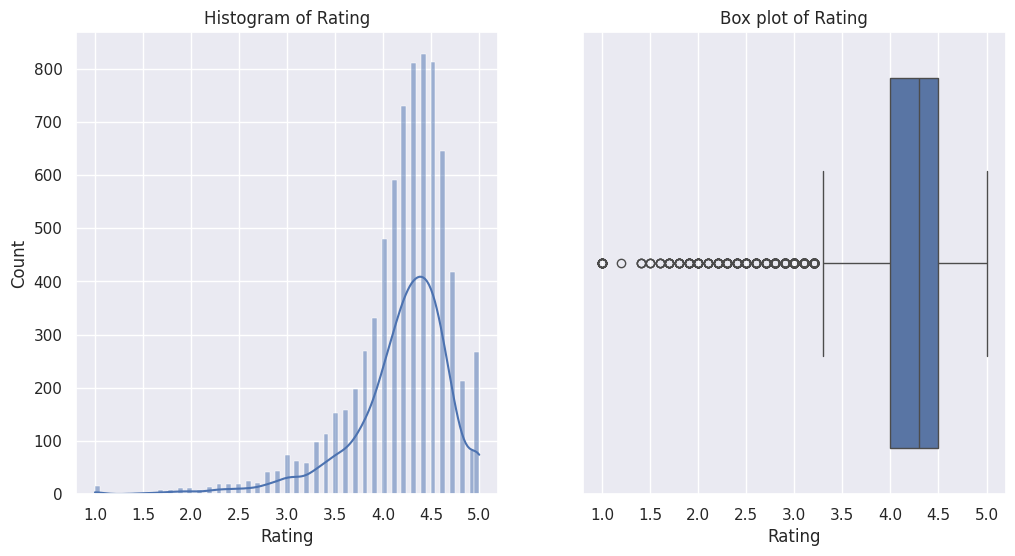

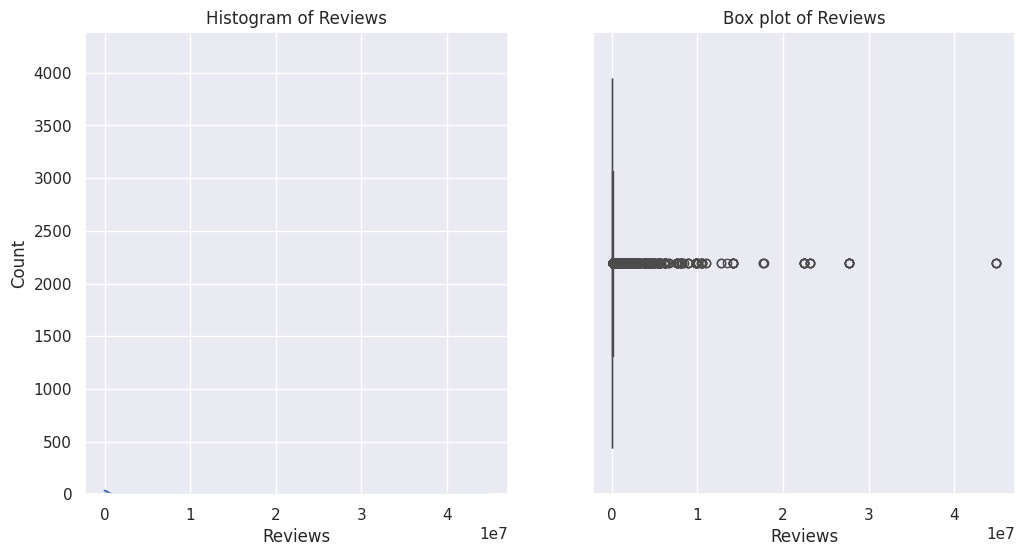

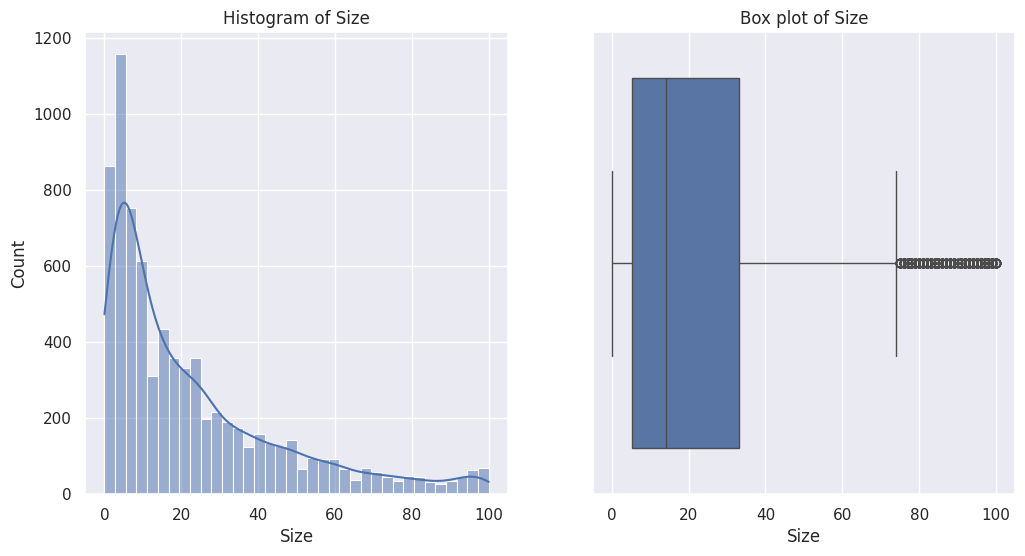

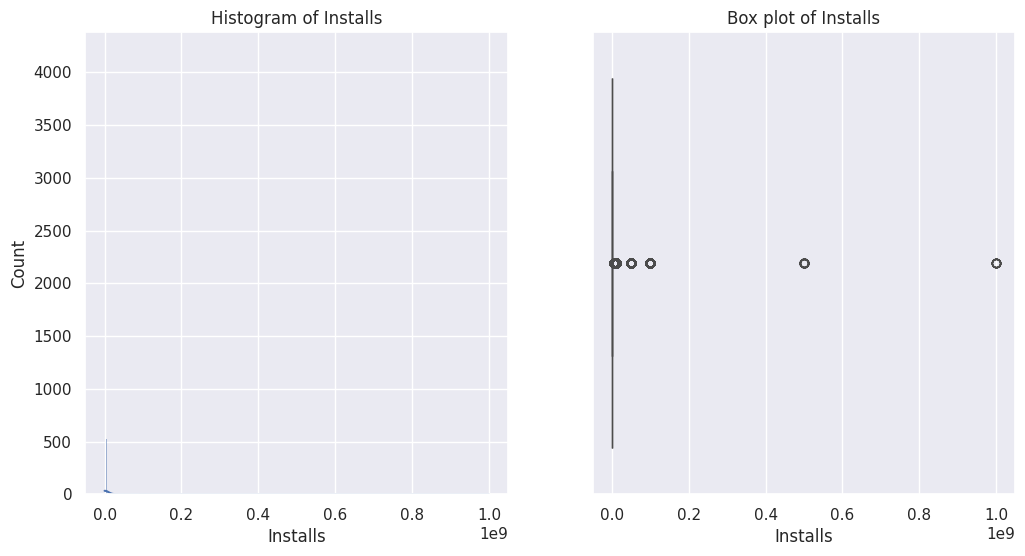

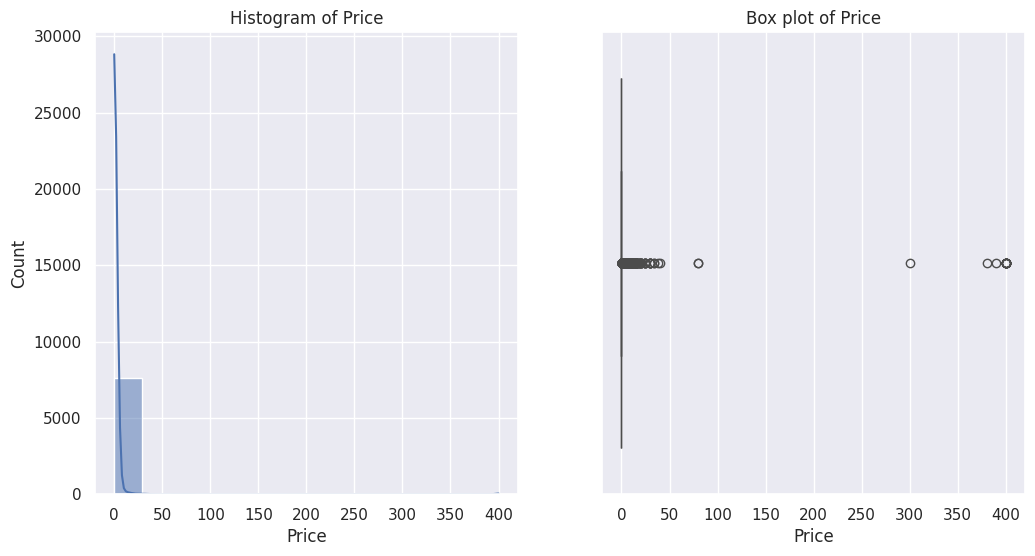

In [36]:
for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()



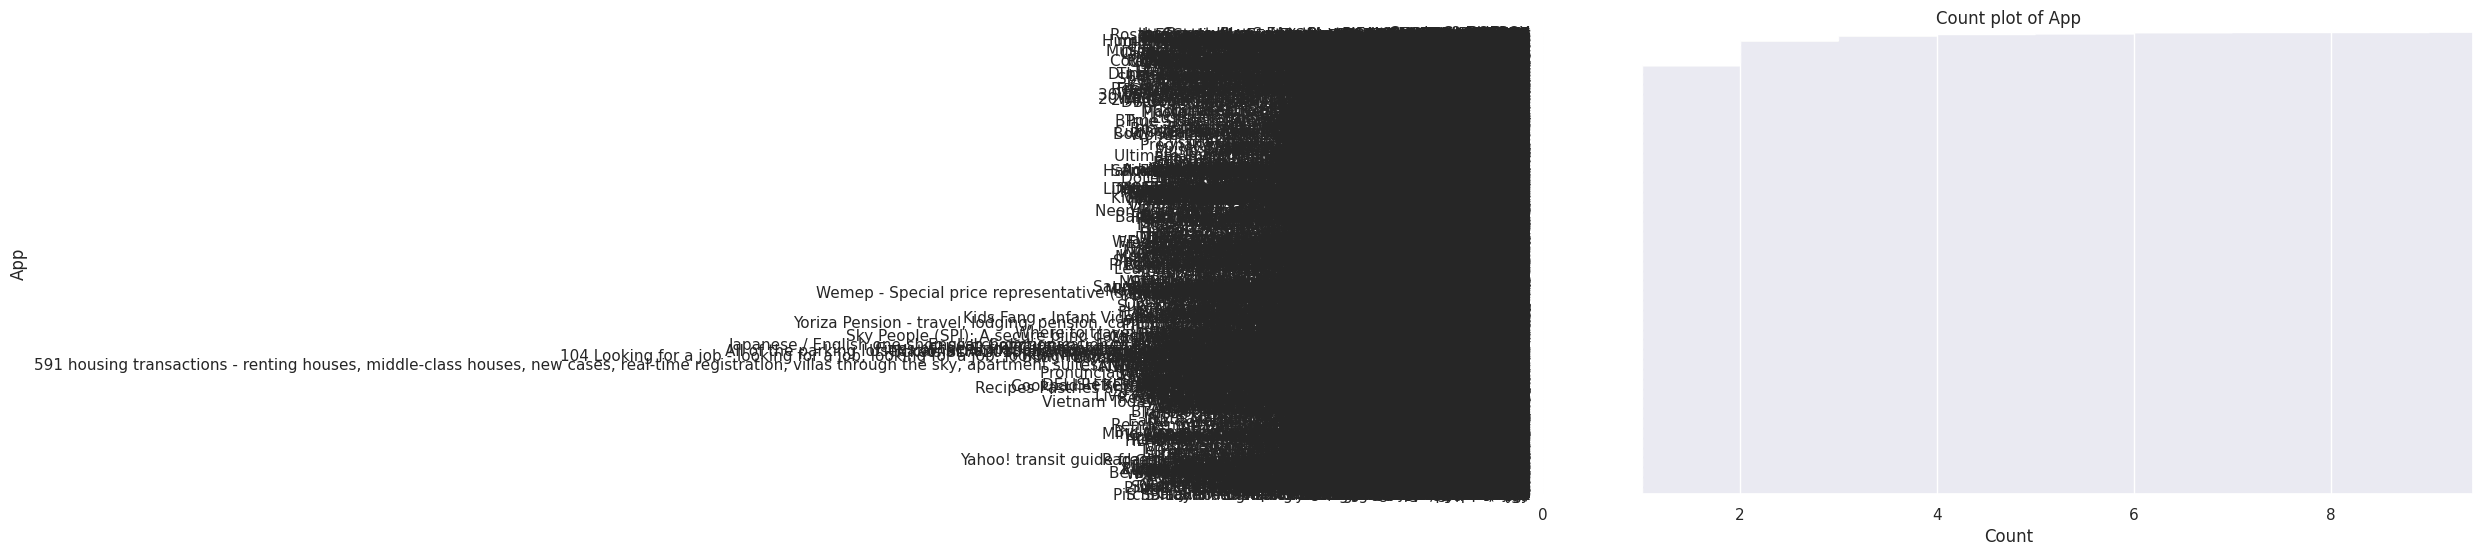

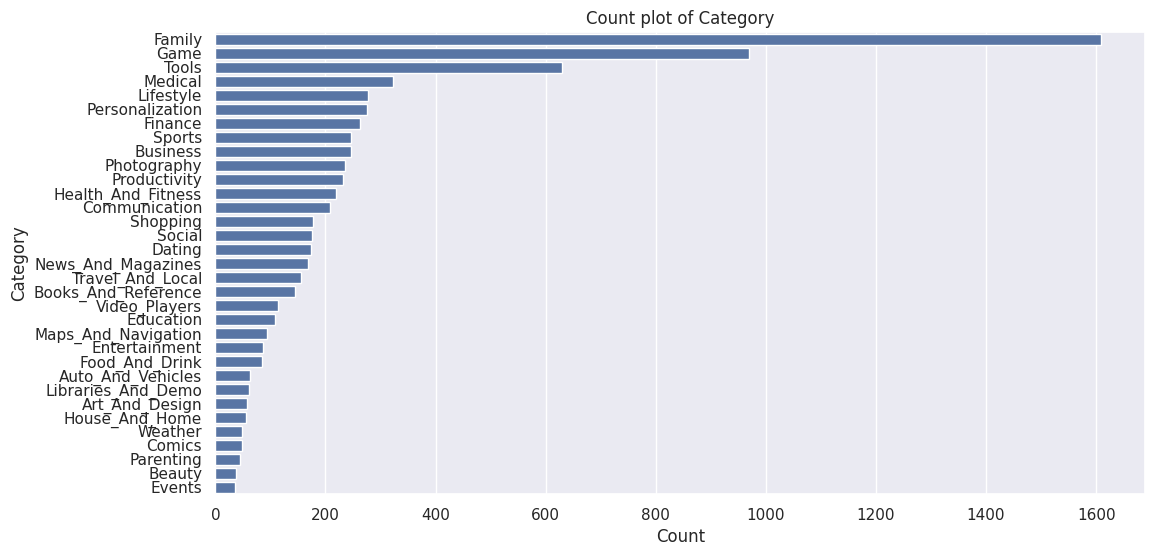

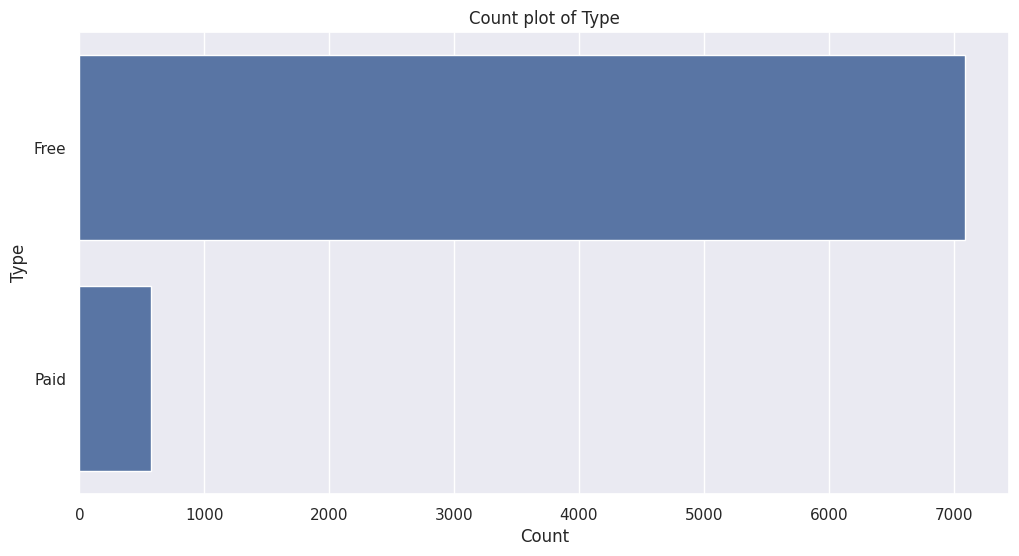

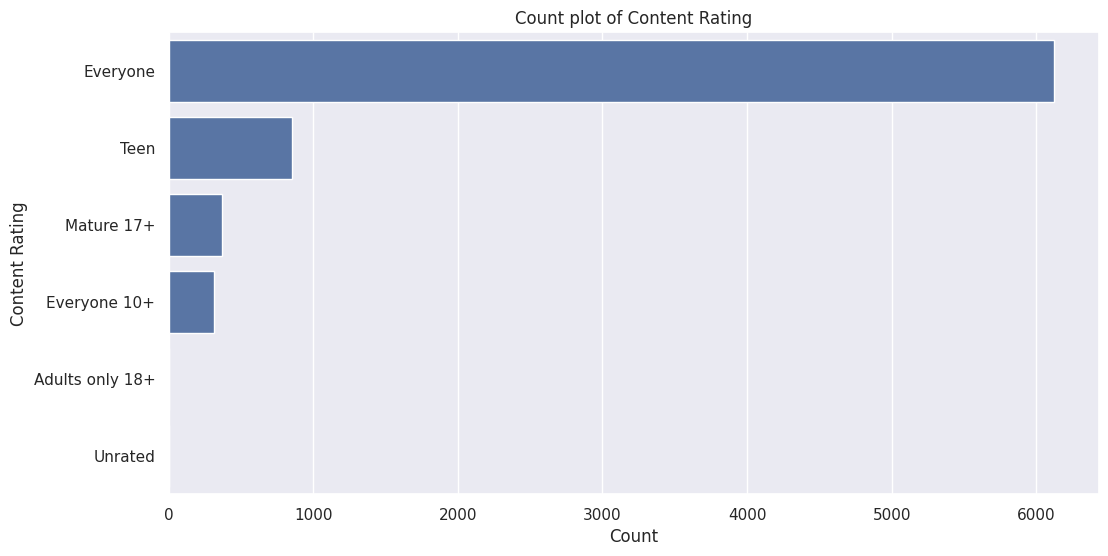

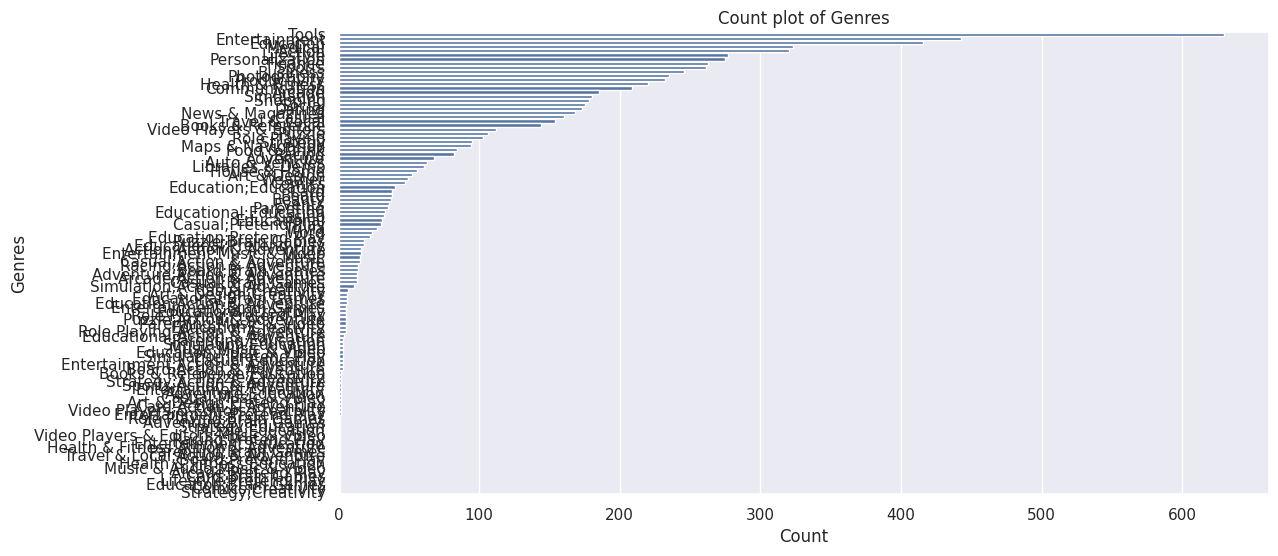

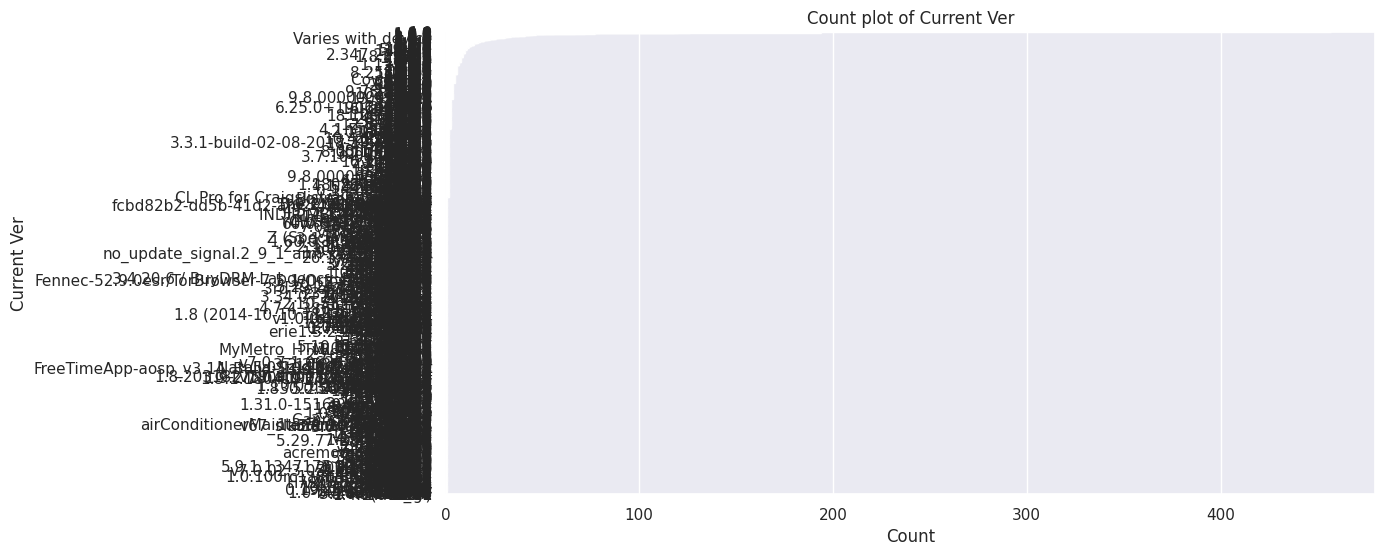

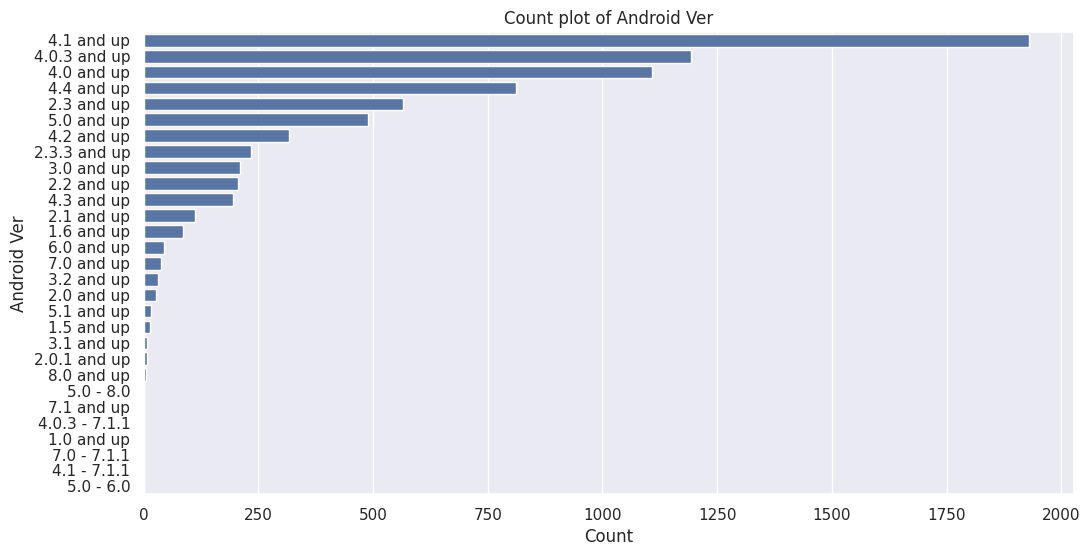

In [37]:
for feature in categorical_columns:
    plt.figure(figsize=(12, 6))

    # Count plot
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Count plot of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

    plt.show()


What is the distribution of app ratings across different categories?


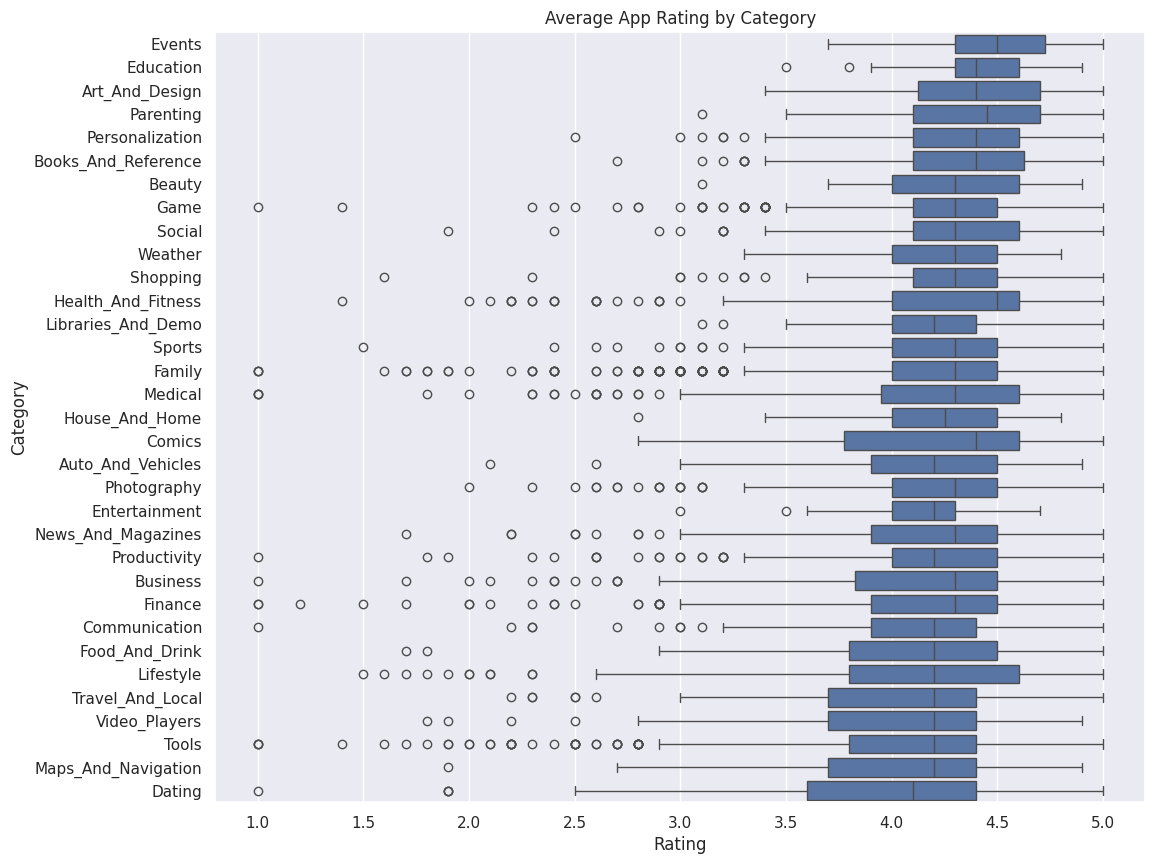

In [41]:
category_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.boxplot(x='Rating',y='Category', data=data, order=category_rating.index)
plt.title('Average App Rating by Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

Are paid apps rated higher than free apps on average?

In [44]:
data['Type'] = data['Type'].apply(lambda x: 'Free' if x == 'Free' else 'Paid')

# Calculating the average rating for free and paid apps
average_ratings = data.groupby('Type')['Rating'].mean().round(2)

print(average_ratings)


Type
Free    4.17
Paid    4.25
Name: Rating, dtype: float64


Is there a correlation between the size of an app and its rating

In [46]:
correlation = data['Size'].corr(data['Rating']).round(3)
print(f'The correlation between app size and rating is: {correlation}')

The correlation between app size and rating is: 0.084


Which app category has the highest number of installs?

In [47]:
category_installs = data.groupby('Category')['Installs'].sum().sort_values(ascending=False)
print(category_installs)

Category
Game                   29804252717
Family                  6776332480
Communication           4939915530
News_And_Magazines      4241900550
Tools                   3518553500
Photography             2547893130
Shopping                1503731540
Productivity            1242302080
Sports                  1138911465
Personalization          943031930
Social                   924240475
Health_And_Fitness       847406220
Video_Players            781662200
Entertainment            650860000
Business                 535932920
Lifestyle                422739120
Travel_And_Local         316638300
Finance                  306886300
Education                278202000
Food_And_Drink           177567750
Maps_And_Navigation      175014560
Dating                   141865110
Books_And_Reference      139784155
Weather                  119296500
Art_And_Design            99228100
House_And_Home            74982000
Libraries_And_Demo        59983000
Medical                   46483076
Auto_And_Ve

Are higher-rated apps updated more frequently?

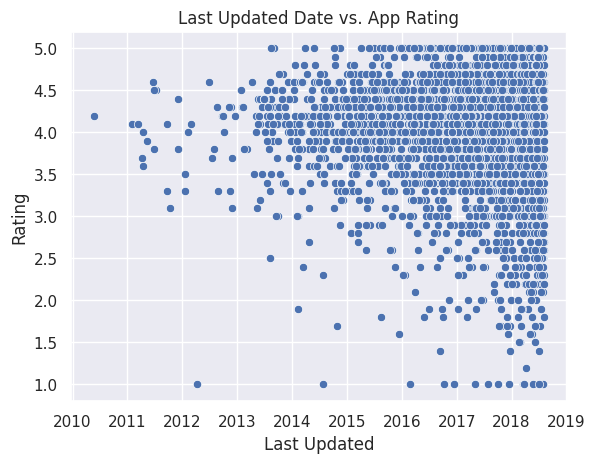

In [48]:
sns.scatterplot(x='Last Updated', y='Rating', data=data)
plt.title('Last Updated Date vs. App Rating')
plt.xlabel('Last Updated')
plt.ylabel('Rating')
plt.show()

Is there a relationship between the size of the app and the number of installs?

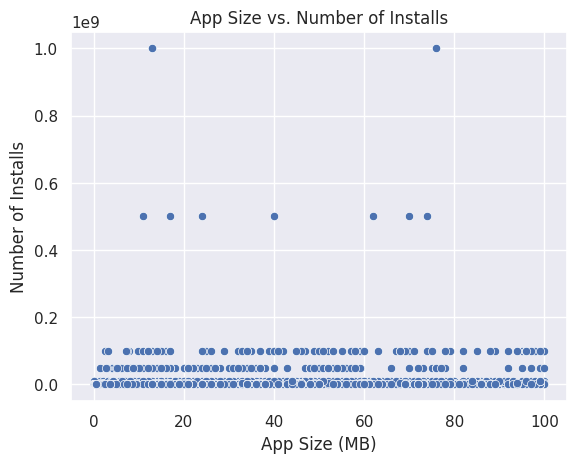

In [49]:
sns.scatterplot(x='Size', y='Installs', data=data)
plt.title('App Size vs. Number of Installs')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs')
plt.show()

How do the ratings of apps vary across different categories and types (Free vs. Paid)?

In [50]:
pd.pivot_table(data, values='Rating', index='Category', columns='Type', aggfunc='mean')

Type,Free,Paid
Category,,
Art_And_Design,4.361818,4.733333
Auto_And_Vehicles,4.147619,NaN
Beauty,4.291892,NaN
Books_And_Reference,4.324088,4.242857
Business,4.113983,4.260000
Comics,4.154167,NaN
Communication,4.109424,4.011111
Dating,3.968421,3.050000
Education,4.379048,4.750000


How do the number of installs, app size, and number of reviews collectively impact app ratings?

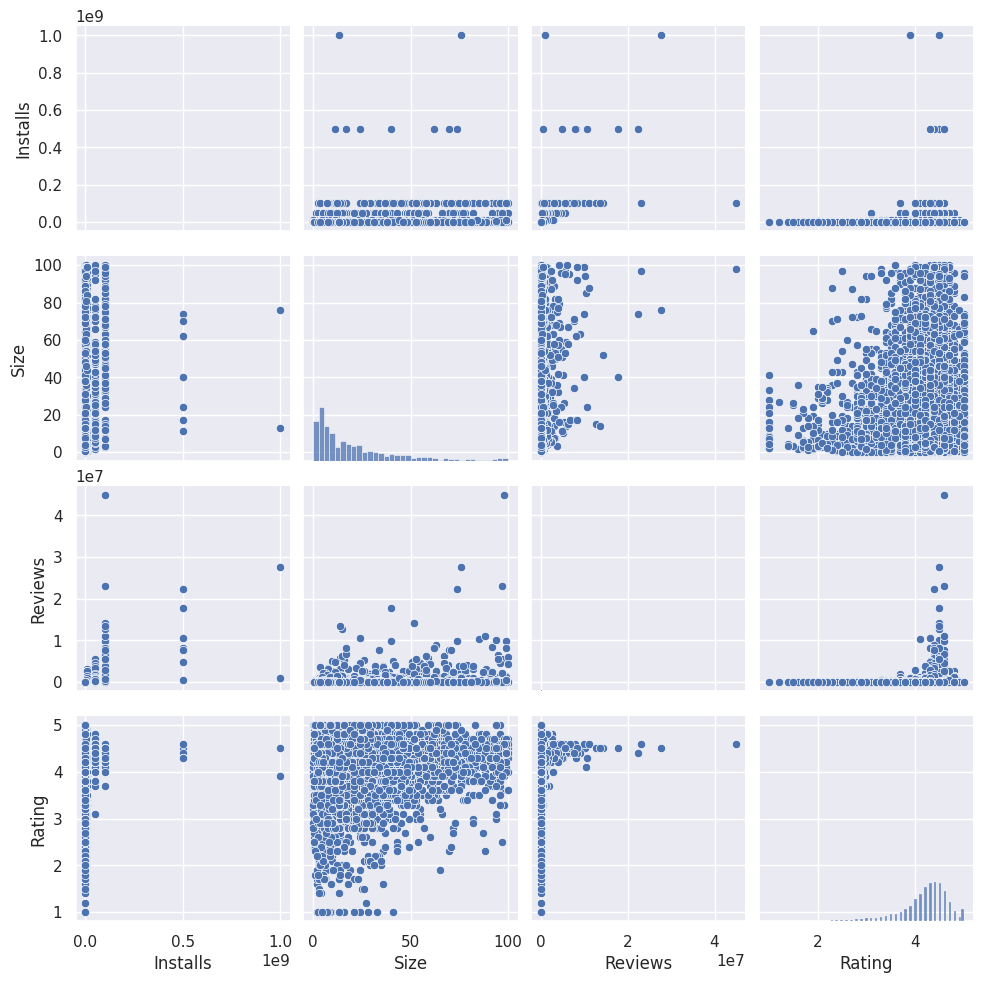

In [51]:
sns.pairplot(data[['Installs', 'Size', 'Reviews', 'Rating']])
plt.show()